In [1]:
using Luxor
using MathTeXEngine

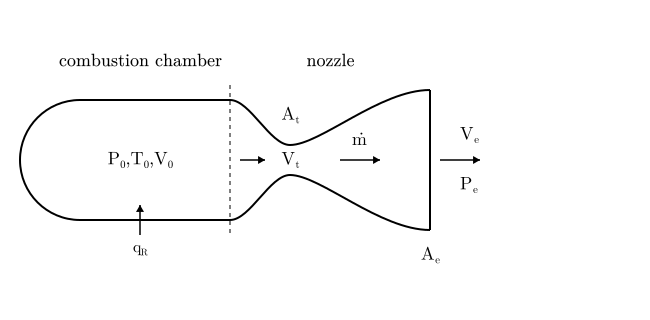

In [24]:
Drawing(650, 320, "../images/ideal-rocket-analysis.svg")
background("white")
origin(Point(250, 160))
sethue("black")

# === Combustion chamber dimensions ===
chamber_width = 180
chamber_height = 120
chamber_left = -200
chamber_right = chamber_left + chamber_width

# === Nozzle dimensions ===
throat_width = 30
converging_start_x = chamber_right
throat_x = chamber_right + 60
nozzle_exit_width = 140  # Larger than chamber height (120)
nozzle_exit_x = throat_x + 140

# === Draw combustion chamber ===
setline(2)

# Chamber body (rounded left end, straight right end)
# Top line
move(Point(chamber_left + 30, -chamber_height/2))
line(Point(chamber_right, -chamber_height/2))
strokepath()

# Bottom line
move(Point(chamber_left + 30, chamber_height/2))
line(Point(chamber_right, chamber_height/2))
strokepath()

# Rounded left end
arc(Point(chamber_left + 30, 0), chamber_height/2, π/2, -π/2, :stroke)

# === Draw converging section ===
# Top converging line
move(Point(chamber_right, -chamber_height/2))
curve(Point(chamber_right + 20, -chamber_height/2), Point(throat_x - 20, -throat_width/2), Point(throat_x, -throat_width/2))
strokepath()

# Bottom converging line
move(Point(chamber_right, chamber_height/2))
curve(Point(chamber_right + 20, chamber_height/2), Point(throat_x - 20, throat_width/2), Point(throat_x, throat_width/2))
strokepath()

# === Draw diverging section (nozzle) ===
# Top diverging line
move(Point(throat_x, -throat_width/2))
curve(Point(throat_x + 30, -throat_width/2), Point(nozzle_exit_x - 50, -nozzle_exit_width/2), Point(nozzle_exit_x, -nozzle_exit_width/2))
strokepath()

# Bottom diverging line
move(Point(throat_x, throat_width/2))
curve(Point(throat_x + 30, throat_width/2), Point(nozzle_exit_x - 50, nozzle_exit_width/2), Point(nozzle_exit_x, nozzle_exit_width/2))
strokepath()

# === Draw exit plane (vertical line at nozzle exit) ===
line(Point(nozzle_exit_x, -nozzle_exit_width/2), Point(nozzle_exit_x, nozzle_exit_width/2), :stroke)

# === Draw nozzle start indicator (dashed vertical line at converging section start) ===
setline(1)
setdash("dash")
line(Point(converging_start_x, -chamber_height/2 - 15), Point(converging_start_x, chamber_height/2 + 15), :stroke)
setdash("solid")

# === Arrow helper function ===
function draw_arrow(from::Point, to::Point; headsize=8)
    line(from, to, :stroke)
    angle = atan(to.y - from.y, to.x - from.x)
    p1 = Point(to.x - headsize * cos(angle - π/6), to.y - headsize * sin(angle - π/6))
    p2 = Point(to.x - headsize * cos(angle + π/6), to.y - headsize * sin(angle + π/6))
    poly([to, p1, p2], :fill)
end

# === Section labels (above the figure, vertically aligned) ===
label_y = -chamber_height/2 - 40
fontsize(18)

# Combustion chamber label (centered horizontally in chamber section)
chamber_center_x = chamber_left + chamber_width/2
text(L"\text{combustion chamber}", Point(chamber_center_x, label_y), halign=:center, valign=:middle)

# Nozzle label (centered horizontally in nozzle section)
nozzle_center_x = (converging_start_x + nozzle_exit_x) / 2
text(L"\text{nozzle}", Point(nozzle_center_x, label_y), halign=:center, valign=:middle)

# === Labels ===
fontsize(18)

# Chamber conditions (P_0, T_0, V_0)
text(L"P_0, T_0, V_0", Point(chamber_left + 90, 0), halign=:center, valign=:middle)

# Throat area A_t (now at actual throat)
text(L"A_t", Point(throat_x, -throat_width/2 - 30), halign=:center, valign=:middle)

# Throat velocity V_t with arrow
setline(1.5)
draw_arrow(Point(throat_x - 50, 0), Point(throat_x - 25, 0), headsize=8)
text(L"V_t", Point(throat_x, 0), halign=:center, valign=:middle)

# Nozzle velocity arrow (inside diverging section)
draw_arrow(Point(throat_x + 50, 0), Point(throat_x + 90, 0), headsize=8)
text(L"\dot{m}", Point(throat_x + 70, -15), halign=:center, valign=:bottom)

# Exit area A_e
text(L"A_e", Point(nozzle_exit_x, nozzle_exit_width/2 + 25), halign=:center, valign=:middle)

# Exit velocity V_e and pressure P_e with arrows
draw_arrow(Point(nozzle_exit_x + 10, 0), Point(nozzle_exit_x + 50, 0), headsize=8)
text(L"V_e", Point(nozzle_exit_x + 30, -25), halign=:left, valign=:middle)

#draw_arrow(Point(nozzle_exit_x + 10, 25), Point(nozzle_exit_x + 50, 25), headsize=8)
text(L"P_e", Point(nozzle_exit_x + 30, 25), halign=:left, valign=:middle)

# === Straight arrow and label for heat transfer (centered below chamber) ===
setline(1.5)
# Arrow starts below and crosses into chamber
draw_arrow(Point(chamber_center_x, chamber_height/2 + 15), Point(chamber_center_x, chamber_height/2 - 15), headsize=8)

fontsize(16)
text(L"q_R", Point(chamber_center_x, chamber_height/2 + 25), halign=:center, valign=:top)

finish()
preview()